In [1]:
%%capture
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn

In [2]:
import seaborn as sns
raw_df = pd.DataFrame(pd.read_csv("../../nytwit_v2.csv"))

# Load, Inspect, and Clean DataFrame

In [3]:
raw_df.head(10)

,Time,Word,Category,URL,Sentence Example
0,Tue Nov 07 19:12:11 2017,ujigami,filtered,https://www.nytimes.com/2017/11/07/travel/shri...,"As Hirota put it, carrying the shrine would “s..."
1,Tue Nov 07 19:12:15 2017,ganbarro,filtered,https://www.nytimes.com/2017/11/07/travel/shri...,"Hirota listened to my excuses, from lingering ..."
2,Tue Nov 07 19:12:25 2017,yamahoko,filtered,https://www.nytimes.com/2017/11/07/travel/shri...,It spans the entire month of July and features...
3,Wed Nov 08 10:01:04 2017,rememed,affix,https://www.nytimes.com/2017/11/08/opinion/ang...,"Thurman’s rage is palpable yet contained, conv..."
4,Wed Nov 08 11:01:14 2017,pinyon,filtered,https://www.nytimes.com/2017/11/08/sports/nava...,Cedar and pinyon logs had burned to embers in ...
5,Wed Nov 08 11:01:42 2017,underdramatic,affix,https://www.nytimes.com/2017/11/08/books/revie...,"The tale of Johnny, his chicken, a cast of sub..."
6,Wed Nov 08 11:02:00 2017,hyperhysteria,affix,https://www.nytimes.com/2017/11/08/books/revie...,But the stately unfolding of Twain’s adapted o...
7,Wed Nov 08 13:01:19 2017,verbolect,filtered,https://www.nytimes.com/2017/11/08/arts/design...,"Now a collective called NonCoreProjector, whic..."
8,Wed Nov 08 23:01:13 2017,fluffypoos,blend,https://www.nytimes.com/2017/11/08/nyregion/wh...,Lemon’s refusal to join the off-leash circus s...
9,Wed Nov 08 23:01:15 2017,shaggydoodles,compound new,https://www.nytimes.com/2017/11/08/nyregion/wh...,Lemon’s refusal to join the off-leash circus s...


In [4]:
raw_df.columns = raw_df.columns.str.replace(' ', '_')
raw_df.columns

Index(['Time', 'Word', 'Category', 'URL', 'Sentence_Example'], dtype='object')

# View rows with existing (False) sentence examples

In [5]:
pd.isna(raw_df.Sentence_Example)

0       False
1       False
2       False
3       False
4       False
        ...  
2582    False
2583    False
2584    False
2585    False
2586    False
Name: Sentence_Example, Length: 2587, dtype: bool

In [6]:
sentence_example_exists = [word for word in pd.isna(raw_df.Sentence_Example)]

sentence_exists_tuple = [(i, boolVal) for i, boolVal in enumerate(sentence_example_exists) if boolVal is True]
true_indeces = [int(i[0]) for i in sentence_exists_tuple]

# Inspect NA's

In [7]:
no_sentence_example_df = pd.DataFrame(raw_df.loc[true_indeces])
no_sentence_example_df.Category.value_counts()

filtered         164
domain             8
blend              6
affix              5
onomatopoeia       4
compound comp      4
deriv              4
infl               3
lengthening        2
dialect            1
infix              1
compound new       1
Name: Category, dtype: int64

# Remove NA's

In [79]:
df = raw_df.dropna()

# Calculate length of sentences in Sentence Example

[[]]

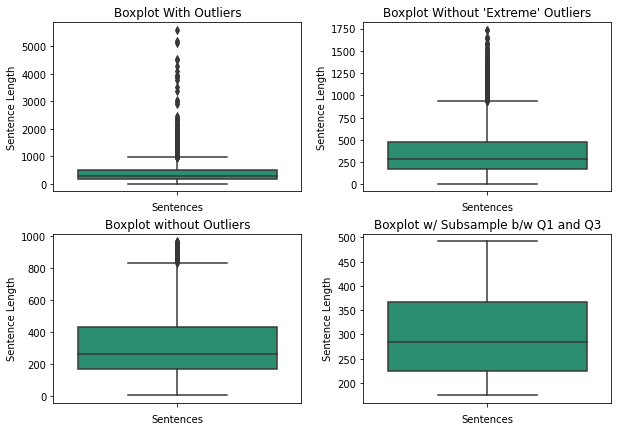

In [117]:
sentence_lengths_all = [len(str(sent)) for sent in raw_df.Sentence_Example]

max_min_difference = abs(np.min(sentence_lengths_all) - np.max(sentence_lengths_all))
max = np.max(sentence_lengths)
min = np.min(sentence_lengths)
q1 = np.quantile(a = sentence_lengths, q = .25)
q2 = np.quantile(a = sentence_lengths, q = .5)
q3 = np.quantile(a = sentence_lengths, q = .75)
q4 = np.quantile(a = sentence_lengths, q = 1.0)
iqr = q3 - q1
max_non_outlier = q3 + 1.5*iqr
min_non_outlier = q1 - 1.5*iqr

outlier_sentence_lengths = [length for length in sentence_lengths if length > max_non_outlier]
remove_extremities = [val for val in sentence_lengths if val < 1750]

# set up figure
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.subplots_adjust(wspace = .25, hspace=.25)

#subplot 0,0
ax1.title.set_text("Boxplot With Outliers")
ax1.set_xlabel("Sentences")
ax1.set_ylabel("Sentence Length")
plot1 = sns.boxplot(data = sentence_lengths, color=sns.set_palette("Dark2"), ax=ax1)
plot1.set(xticklabels=[])


#subplot 0,1
ax2.title.set_text("Boxplot Without 'Extreme' Outliers")
ax2.set_xlabel("Sentences")
ax2.set_ylabel("Sentence Length")
plot2 =sns.boxplot(data = remove_extremities, ax=ax2) 
plot2.set(xticklabels=[])

#subplot 1, 0
ax3.title.set_text("Boxplot without Outliers")
ax3.set_xlabel("Sentences")
ax3.set_ylabel("Sentence Length")
plot3 = sns.boxplot(data = [length for length in sentence_lengths_all if ((length>= min_non_outlier) & (length <= max_non_outlier))], ax = ax3)
plot3.set(xticklabels=[])

#subplot 1, 1
ax4.title.set_text("Boxplot w/ Subsample b/w Q1 and Q3")
ax4.set_xlabel("Sentences")
ax4.set_ylabel("Sentence Length")
plot4 = sns.boxplot(data = [length for length in sentence_lengths_all if ((length>=q1) & (length <= q3))], ax = ax4)
plot4.set(xticklabels=[])

# Empirical CDF to show us what % of the data lies below a certail sentence length 

Text(0, 0.5, '% of Data Points')

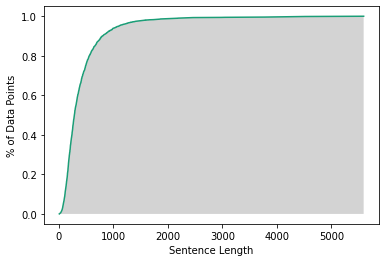

In [111]:
plt.plot(np.sort(sentence_lengths), np.linspace(0, 1, len(sentence_lengths)))
plt.fill_between(np.sort(sentence_lengths), np.linspace(0, 1, len(sentence_lengths)), facecolor='lightgray')
plt.xlabel("Sentence Length")
plt.ylabel("% of Data Points")

In [112]:
%%capture
tokenize_sentences = [nltk.word_tokenize(str(sent)) for sent in df.Sentence_Example]

# Term Frequency

### Let's measure the frequency of our target words (Word column) in each Sentence Example (Sentence_Example column)

$$tf(t, d) = \frac{count\space of\space t\space in\space d}{number\space of\space words\space in\space d}$$

### Example for First Word

In [113]:
raw_df.head(1)

,Time,Word,Category,URL,Sentence_Example
0,Tue Nov 07 19:12:11 2017,ujigami,filtered,https://www.nytimes.com/2017/11/07/travel/shri...,"As Hirota put it, carrying the shrine would “s..."


$$tf(ujigami, "As\space Hirota\space put\space it...") = \frac{count\space of\space ujigami\space in\space "As\space Hirota\space put\space it..."}{number\space of\space words\space in\space " As\space Hirota\space put\space it..."}$$



In [85]:
def tf(t, d):
    count = 0
    tokenized_d = nltk.word_tokenize(d)
    for word in tokenized_d:
        if str(word) == str(t):
            count += 1
    return count/len(tokenized_d)

tf('ujigami', "As Hirota put it, carrying the shrine would “show off our manpower” and prove to the unseen spirit inside, known as an ujigami, that the people in the small town of Miyoshi in Chiba prefecture were strong enough to take care of their community for yet another year.“How much does it weigh?”“You’re about to find out.”Hirota helped me into my robe, tying all the knots for me, instead of guiding me through.Unlike ours, their ujigami was ensconced in a large, wheeled float that was covered in paper lanterns and pulled by its bearers via two enormous dockyard ropes.Also unlike ours, their procession was musical.An ujigami is a Shinto deity and therefore has no name, no features, no disposition, but it can retain a certain characteristic.Whereas our ujigami liked to be jostled and bobbed like an upside down pendulum, this one liked music.)—scenting the air with licorice—and every summer night bush-league yakuza rattle past your windows, gunning motorcycle engines.There’s a delicate balance to it all that is held together by a community willing to bend and band together.But what happens to a place when its people are no longer strong enough to take care of their community another year?I watched the procession disappear back into its neighborhood for the last time, where the drumbeats faded to a murmur: the sound of an ujigami retiring.“Even if I drink sake, my spirit doesn’t get drunk, until the matsuri is over,” our kiyari-shu sang.")
tf('glypticians', "But, when asked, “Who was the glyptician?” Mr. Hemmerle, like many others in the business, answered, “I cannot reveal my sources.”Few glypticians are known to the public; most work behind the scenes, hired by houses when their particular skills are needed.The houses will not identify them, worried about the lure of rivals, and over generations the glypticians themselves have become distinctly reticent.Florian said glypticians like Gerd Dreher or Manfred Wild had made their names by crafting animal sculptures, usually private orders.These masters are able to obtain the best raw materials and command prices that, she said, can rise to as much as three times the value of the stones they use.In addition to the Idar-Oberstein area, glypticians also can be found in other regions rich in stone or gems that can be carved.Like many glypticians, Mr. Chan makes his own tools: “I even have sometimes to build the machines first in order to build my own tools.”The glyptician’s approach to work provides another key to understanding the skill.")


0.025510204081632654

In [118]:
%%capture
def dictFromColumns(data, col1, col2):
    contentsCol1 = [val for val in data[col1].values]
    contentsCol2 = [val for val in data[col2].values]
    dictionaryOfColumns = dict(zip(contentsCol1, contentsCol2))
    return dictionaryOfColumns

dictFromColumns(df, 'Word', 'Sentence_Example')

# To Do: 

### 1. Create a sublist of the lengths ranging from Q1 to Q3
### 2. Map those words between Q1-Q3 together with their corresponding sentence example
### 3. Calculate the TF-IDF for those words using the tf function.